<a href="https://colab.research.google.com/github/akshar1277/Pytorch_learning/blob/main/02_pytorch_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 02. Neural Network classification with PyTorch

Classification is a problem of predicting whether something is one thing or another (there can be multiple things as the options).



### 1. Make classfication data and get it ready

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples=1000

# create circles
X,y=make_circles(n_samples,noise=0.03,random_state=42)

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
print(f"First 5 samples of X: \n {X[:5]}")
print(f"First 5 samples of y: \n {y[:5]}")

First 5 samples of X: 
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
 [1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd
circles=pd.DataFrame({"x1":X[:,0],
                      "X2":X[:,1],
                      "label":y})
circles.head(10)

,x1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


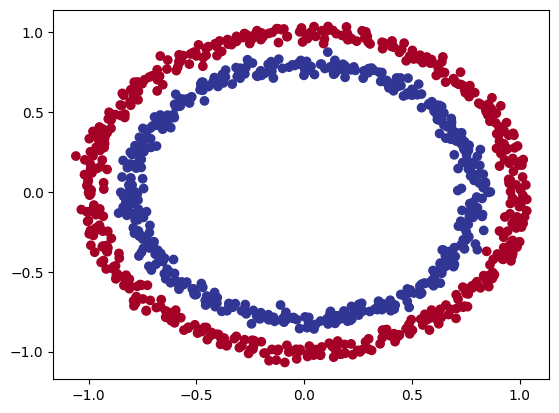

In [ ]:
# Visualise
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

Note : The data we're working with if ofter referred to as a toy dataset,that is small enough to experiment but still sizeable enough to practice the fundaments

 ### 1.1 Check input and output shapes

In [ ]:
 X


array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# View the first examples of features and labels
X_sample=X[0]
y_sample=y[0]

print(f"values for one smample of x: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one smample of x: {X_sample.shape} and the same for y: {y_sample.shape}")


values for one smample of x: [0.75424625 0.23148074] and the same for y: 1
Shapes for one smample of x: (2,) and the same for y: ()



### 1.2 Turn data into tensors and create train and test splits


In [ ]:
# Turn data into tensors

import torch

In [ ]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
# Split daata into trainig and test sets

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42
                                              )

In [ ]:
len(X_train)

800

## 2. Building a model

Lets build a model to classify our blue and red dots.

To do so we want to:
1. setup device agonstic code so our code will run on a n accelerator (GPU) if there is one
2. construct a model (by subclassing `nn.Module`)
3. Define a loss function and opimizer
4. Create a training and test loop





In [ ]:
# import pytorch and nn
import torch
from torch import nn

# Make device agnostic code

device= "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Noe we've setup device agonostic code,let's create a model that:

1. Subclasses `nn.Module` (almost all models in Pytorch subclass `nn.module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes of our data
3. Defines a `forward()` method that outlines the forward pass (or forward computation ) of the model .
4. Instatiate  an instace of our model class and send it to the target device


In [ ]:
from sklearn import datasets
# 1. Construct  a model that subclass nn.Module

class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Create 2 nn.Linear layers capable  of handling the shapes of our data
    self.layer_1=nn.Linear(in_features=2,out_features=5) #takes in 2 features and upsclase to 5 features
    self.layer_2=nn.Linear(in_features=5,out_features=1)

  #3. Define a froward() method that outliines the forward pass
  def forward(self,x):
    return self.layer_2(self.layer_1(x)) #x-> layer_1 -> layer_2 ->output

# 4.Instantiate an instance of our model class and send it to the target device

model_0=CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
device

'cuda'

In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# lets replicate the model above using nn.sequential()

model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.1251,  0.1516],
                      [-0.1969, -0.0141],
                      [ 0.6682, -0.4592],
                      [ 0.1871, -0.5880],
                      [-0.6534, -0.5070]], device='cuda:0')),
             ('0.bias',
              tensor([-0.1323, -0.0918, -0.5302, -0.0254,  0.2657], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0120, -0.0076, -0.4108,  0.4217, -0.1265]], device='cuda:0')),
             ('1.bias', tensor([0.0295], device='cuda:0'))])

In [ ]:
# Make predictions
with torch.inference_mode():

  untrained_pred=model_0(X_test.to(device))
print(f"Length of predictions:{len(untrained_pred)} , shape:{untrained_pred.shape}")
print(f"Length of test samples: {len(X_test)}, shape: {X_test.shape}")
print(f"\n First 10 predictions: \n {untrained_pred[:10]}")
print(f"\n First 10 labels:\n {y_test[:10]}")

Length of predictions:200 , shape:torch.Size([200, 1])
Length of test samples: 200, shape: torch.Size([200, 2])

 First 10 predictions: 
 tensor([[0.2487],
        [0.2066],
        [0.2816],
        [0.2397],
        [0.1588],
        [0.1340],
        [0.1129],
        [0.0956],
        [0.2867],
        [0.2024]], device='cuda:0')

 First 10 labels:
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

which loss function or optimizer should you use ?

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

For classfication you might want binary cross entroy or categorical cross entropy

As a remineder the loss functin measure how wrong your models predictions are.

And for optimizers two fo the most common and useful are SGD and Adam however PyTorch has many built-in options.

* For the loss function we're going to use `torch.nn.BECwithLogitsLoss()`


In [ ]:
# setup the loss function
# loss_fn=nn.BCELoss() # requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn=nn.BCEWithLogitsLoss() # it is sigmoid activation function.

optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [ ]:
# calculate accuracy
def accuracy_fn(y_true,y_pred):
  correct=torch.eq(y_true,y_pred).sum().item()
  acc=(correct/len(y_pred)) * 100
  return acc



## 3. Train model
To train our model ,

1. forward pass
2. calculate the loss
3. optimizer zero grad
4. loss backward
5. optimizer step (gradient descent )

In [ ]:
#  view the first 5 output of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
  y_logits=model_0(X_test.to(device))[:5]
y_logits


tensor([[0.2487],
        [0.2066],
        [0.2816],
        [0.2397],
        [0.1588]], device='cuda:0')

In [ ]:
# use the sigmoid activation fucntion on our model logits to them into prediction probability

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs


tensor([[0.5619],
        [0.5515],
        [0.5699],
        [0.5596],
        [0.5396]], device='cuda:0')

For our prediction probablity values we need to perform a range-style rounding on them .


In [ ]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

### 3.2 building training and testing loop

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

#put data to target device
X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)


# build training and evalution loop

for epoch in range(epochs):

  # training
  model_0.train()

  # 1 forward pass

  y_logits=model_0(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  # 2. calculate the loss
  # loss = loss_fn(torch.sigmoid(y_logits),y_train)  # nn.BCELoss expects predictions probablity as input
  loss= loss_fn(y_logits,y_train) #nn.BCEWithLogitLoss expects raw logits as input

  acc= accuracy_fn(y_true=y_train,y_pred=y_pred)

  # 3. optimizer zero grad

  optimizer.zero_grad()

  # 4. loss backward (backpropagation)

  loss.backward()

  # 5. optimizer step (gradient descent)
  optimizer.step()

  # testing
  model_0.eval()

  with torch.inference_mode():

    #1. forward pass

    test_logits=model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. calculate test loss/acc

    test_loss=loss_fn(test_logits,y_test)

    test_acc = accuracy_fn(y_true=y_test,y_pred=test_pred)



  if epoch%10==0:
    print(f"Epoch:{epoch} | Loss: {loss:.5f},Acc:{acc:.2f} | Test Loss: {test_loss:.5f}, Test acc, {test_acc:.2f}")





Epoch:0 | Loss: 0.69874,Acc:50.00 | Test Loss: 0.69700, Test acc, 50.00
Epoch:10 | Loss: 0.69541,Acc:50.00 | Test Loss: 0.69445, Test acc, 50.00
Epoch:20 | Loss: 0.69407,Acc:50.00 | Test Loss: 0.69358, Test acc, 50.00
Epoch:30 | Loss: 0.69351,Acc:50.00 | Test Loss: 0.69334, Test acc, 50.00
Epoch:40 | Loss: 0.69326,Acc:50.00 | Test Loss: 0.69335, Test acc, 50.00
Epoch:50 | Loss: 0.69315,Acc:59.00 | Test Loss: 0.69343, Test acc, 55.50
Epoch:60 | Loss: 0.69310,Acc:53.12 | Test Loss: 0.69354, Test acc, 51.00
Epoch:70 | Loss: 0.69306,Acc:51.62 | Test Loss: 0.69364, Test acc, 49.00
Epoch:80 | Loss: 0.69304,Acc:51.25 | Test Loss: 0.69375, Test acc, 47.50
Epoch:90 | Loss: 0.69303,Acc:50.88 | Test Loss: 0.69384, Test acc, 47.50


## 4. Make predictions and evaluate the model

From the metrics it looks like our model isnt learning anything

so to inspect it let;s make some prediction sand then visual

to do so we're going to import a function called `plot_decision_boundry()`

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn Pytorc repos

if Path("hepler_functions.py").is_file():
  print("helper funciton already exists ,skipping download")
else:
  print("Download helper_functions.py")

  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary

Download helper_functions.py


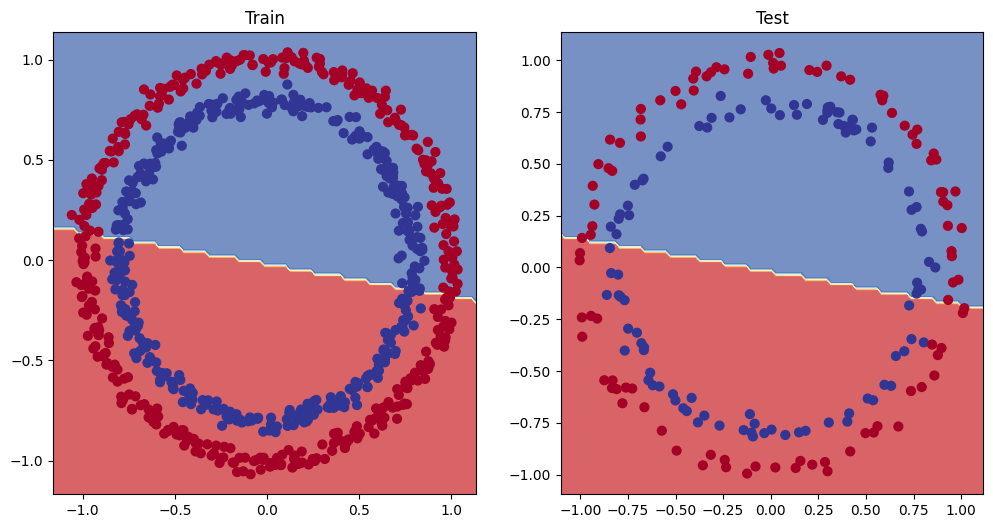

In [ ]:
# plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)


## 5. Imporving  a model (from a model perspective)

* Add more layes - give the model more chances to learn about patterns in the data
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer
* changing the activation functions
* change the learning rate
* change the loss function